In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta 
import matplotlib.pyplot as plt
import statsmodels as sm

## Check for null model

In [2]:
df1 = pd.read_csv('../../data/train_validation_marker.csv')

In [3]:
df1['SALES_DATE'] =  pd.to_datetime(df1['SALES_DATE'])

In [4]:
train_data = df1[(df1['validation_clean'] == True) &(df1['validation'] == False)]
val_data = df1[(df1['validation_clean'] == True) &(df1['validation'] == True)]

In [5]:
train_data.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,max_SALES_DATE,delta_days,validation,validation_clean
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1,2022-07-31,1767,False,True
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18,2022-07-31,1710,False,True
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7,2022-07-31,976,False,True
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7,2022-07-31,1373,False,True
5,5,2018-12-18,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,?,?,Fully-Stocked,5,2022-07-31,1321,False,True


In [6]:
a = train_data[train_data['SALES_DATE'] =='2022-07-18']
b = train_data[train_data['SALES_DATE'] =='2022.07.19']
c = train_data[train_data['SALES_DATE'] =='2022.07.20']
d = train_data[train_data['SALES_DATE'] =='2022.07.21']
e = train_data[train_data['SALES_DATE'] =='2022.07.22']
f = train_data[train_data['SALES_DATE'] =='2022.07.23']
g = train_data[train_data['SALES_DATE'] =='2022.07.24']
pred_null = a.append(b).append(c).append(d).append(e).append(f).append(g)

/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_41687/2700970667.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_null = a.append(b).append(c).append(d).append(e).append(f).append(g)
/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_41687/2700970667.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_null = a.append(b).append(c).append(d).append(e).append(f).append(g)
/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_41687/2700970667.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_null = a.append(b).append(c).append(d).append(e).append(f).append(g)
/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_41687/2700970667.py:8: FutureWarning: The frame.append method is dep

In [7]:
pred_null.shape, a.shape,b.shape,c.shape, d.shape, e.shape, f.shape, g.shape

((3761, 15),
 (536, 15),
 (536, 15),
 (536, 15),
 (536, 15),
 (536, 15),
 (536, 15),
 (545, 15))

In [8]:
val_data.shape

(3815, 15)

In [9]:
3815/7

545.0

In [10]:
sku_miss = list(a['Encoded_SKU_ID'])
sku_all = list(g['Encoded_SKU_ID'])

In [11]:
miss  = [x for x in sku_all if x not in sku_miss]

In [12]:
miss

[517, 132, 159, 223, 329, 471, 210, 308, 423]

In [13]:
from datetime import timedelta

In [14]:
df1.groupby('Encoded_SKU_ID')['SALES_DATE'].count()

Encoded_SKU_ID
1      1884
2      1891
3      1838
4      1197
5      1891
       ... 
571    1044
572     659
573    1100
574     869
575     736
Name: SALES_DATE, Length: 575, dtype: int64

In [15]:
pred_null = pred_null[['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']]
val = val_data[['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']]

In [16]:
pred_null['SALES_DATE'] = pred_null['SALES_DATE']+ timedelta(days = 7)

In [17]:
pred_null.head()

,Encoded_SKU_ID,SALES_DATE,DAILY_UNITS
21,22,2022-07-25,4
607,361,2022-07-25,0
1014,67,2022-07-25,1
1930,73,2022-07-25,0
2829,43,2022-07-25,1


In [18]:
check = val.merge(pred_null, on=['Encoded_SKU_ID','SALES_DATE'])

In [19]:
check.shape

(3761, 4)

In [20]:
check.head()

,Encoded_SKU_ID,SALES_DATE,DAILY_UNITS_x,DAILY_UNITS_y
0,96,2022-07-27,2,2
1,187,2022-07-29,0,1
2,297,2022-07-29,6,4
3,372,2022-07-27,1,0
4,412,2022-07-26,4,3


In [21]:
rmse = np.sqrt(np.mean((check['DAILY_UNITS_x']-check['DAILY_UNITS_y'])**2))

In [22]:
rmse

6.501712698499228

### Therefore, the data is not complete or continuous, we might have to conduct data cleaning

## Next, the Holt Winter Model

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Use one SKU as example

In [27]:
import sys
sys.path.append("/Users/yibeihu/bestbuy_project/")
from src.utils import *

In [200]:
sku_1_val = df1[(df1['Encoded_SKU_ID']==1) & (df1['validation'] == True) & (df1['validation_clean'] == True)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']].set_index('SALES_DATE')
sku_1_train = df1[(df1['Encoded_SKU_ID']==1) & (df1['validation'] == False)& (df1['validation_clean'] == True)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']].set_index('SALES_DATE')

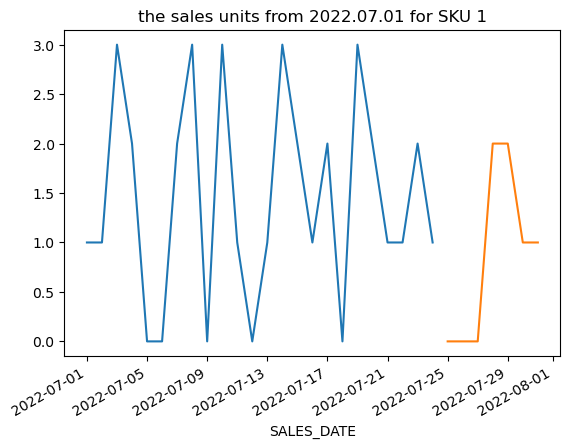

In [201]:
sku_1_train.loc['2022.07.01':]['DAILY_UNITS'].plot()
sku_1_val['DAILY_UNITS'].plot()
plt.title("the sales units from 2022.07.01 for SKU 1")
plt.show()

In [55]:
sku_1_train.sort_index(inplace=True)

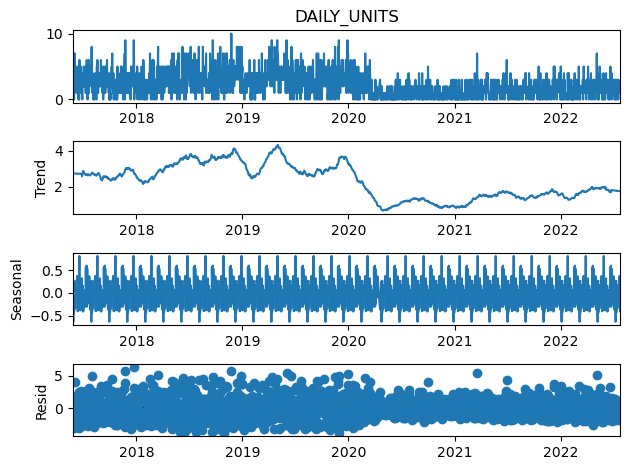

In [58]:
decompose_result = seasonal_decompose(x=sku_1_train['DAILY_UNITS'], model='additive', extrapolate_trend='freq', period= 62)
decompose_result.plot()

In [68]:
unit_freq = train_data.groupby('Encoded_SKU_ID',as_index= False)['DAILY_UNITS'].nunique()
unit_freq['DAILY_UNITS'].median(),unit_freq['DAILY_UNITS'].mean()
hig_var_sku = unit_freq[unit_freq['DAILY_UNITS']>100]['Encoded_SKU_ID']
hig_var_sku[:5]

/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_41687/1195310030.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  hig_var_sku[:5]


21    24
46    50
69    74
91    97
93    99
Name: Encoded_SKU_ID, dtype: int64

In [202]:
sku_144_val = df1[(df1['Encoded_SKU_ID']==1) & (df1['validation'] == True) & (df1['validation_clean'] == True)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']].set_index('SALES_DATE')
sku_144_train = df1[(df1['Encoded_SKU_ID']==1) & (df1['validation'] == False)& (df1['validation_clean'] == True)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']].set_index('SALES_DATE')

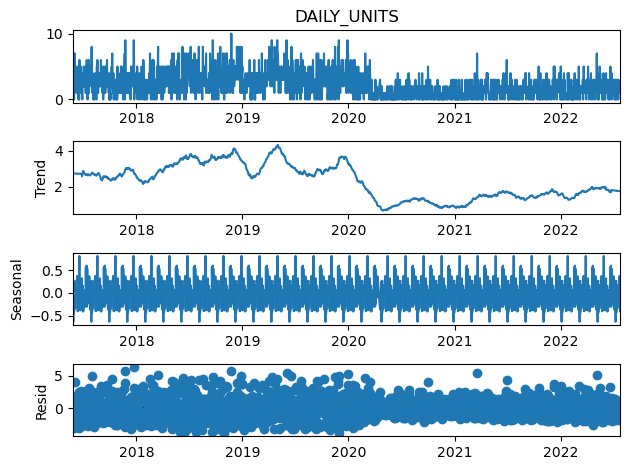

In [203]:
sku_144_train.sort_index(inplace=True)
decompose_result = seasonal_decompose(x=sku_144_train['DAILY_UNITS'], model='additive', extrapolate_trend='freq', period= 62)
decompose_result.plot();

## Fit Holt_winters for SKU 144

In [204]:
fitted_model = ExponentialSmoothing(sku_144_train['DAILY_UNITS'],trend='add',seasonal='add',seasonal_periods=12).fit()
forecast = fitted_model.forecast(7)

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [205]:
forecast

1877    1.422840
1878    1.640721
1879    1.570244
1880    1.583084
1881    1.461303
1882    1.627928
1883    1.429285
dtype: float64

In [206]:
sku_144_val.reset_index(inplace = True)

In [207]:
sku_144_val

,SALES_DATE,Encoded_SKU_ID,DAILY_UNITS
0,2022-07-25,1,0
1,2022-07-27,1,0
2,2022-07-29,1,2
3,2022-07-31,1,1
4,2022-07-26,1,0
5,2022-07-28,1,2
6,2022-07-30,1,1


In [208]:
prediction = pd.DataFrame(forecast,columns=['predicted']).reset_index(drop=True)
prediction['Encoded_SKU_ID'] = sku_144_val['Encoded_SKU_ID']
prediction['SALES_DATE'] = sku_144_val['SALES_DATE']

In [209]:
#sku_144_val.reset_index(drop = True, inplace = True)
sku_144_train.reset_index(drop = True,inplace = True)

In [210]:
sku_144_val.rename(columns={'DAILY_UNITS':'actual'}, inplace = True)

In [212]:
rmse(sku_144_val,prediction)

1.048757647064505

## Fit Holt_winters to whole dataset

In [292]:
def fit_es(sku,df1,seasonal_periods=62):
    y_pred = pd.DataFrame()
    y_actual = pd.DataFrame()

    for i in sku:
    # clean train data on item i
        train = df1[(df1['Encoded_SKU_ID']==i) & (df1['validation'] == False)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']]
        train['SALES_DATE'] = pd.to_datetime(train['SALES_DATE'])
        train.set_index('SALES_DATE', inplace = True)
    
        val = df1[(df1['Encoded_SKU_ID']==i) & (df1['validation'] == True)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']]
        val['SALES_DATE'] = pd.to_datetime(val['SALES_DATE'])
        val.set_index('SALES_DATE', inplace = True)
    
    # train the ARIMA model with auto train & make the forecast
        model = ExponentialSmoothing(train['DAILY_UNITS'],trend='add',seasonal='add',seasonal_periods=seasonal_periods).fit()
        forecast = model.forecast(7)
    
    #Construct the predicted dataframe
        prediction = pd.DataFrame(forecast,columns=['predicted']).reset_index(drop=True).set_index(val.index)
        prediction['Encoded_SKU_ID'] = val['Encoded_SKU_ID']
        prediction.reset_index(inplace = True)
        y_pred = pd.concat([y_pred, prediction], axis = 0)
    
    #Construct the actual dataframe
        val.reset_index(inplace = True)
        val.rename(columns={'DAILY_UNITS':'actual'}, inplace = True)
        y_actual = pd.concat([y_actual, val], axis = 0)
        
    return(y_pred,y_actual)

In [293]:
clean_sku = list(set(df1[(df1['validation'] == False) & (df1['validation_clean'] == True)]['Encoded_SKU_ID']))

In [294]:
y_pred_all ,y_actual_all = fit_es(clean_sku,df1)

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has n

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has n

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has n

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has n

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction 

In [295]:
rmse(y_pred_all ,y_actual_all)

38.62442546145536

In [239]:
hig_var_sku.head()

21    24
46    50
69    74
91    97
93    99
Name: Encoded_SKU_ID, dtype: int64

In [296]:
high_var_pred = y_pred_all[y_pred_all['Encoded_SKU_ID'].isin(list(hig_var_sku))]
high_var_act = y_actual_all[y_actual_all['Encoded_SKU_ID'].isin(list(hig_var_sku))]

In [297]:
rmse(high_var_pred ,high_var_act)

144.82637049706778

In [248]:
low_var_sku = unit_freq[unit_freq['DAILY_UNITS']<22]['Encoded_SKU_ID']

In [298]:
low_var_pred = y_pred_all[y_pred_all['Encoded_SKU_ID'].isin(list(low_var_sku))]
low_var_act = y_actual_all[y_actual_all['Encoded_SKU_ID'].isin(list(low_var_sku))]

In [299]:
rmse(low_var_pred ,low_var_act)

1.7393303699005127

In [254]:
df1['DAILY_UNITS'].min()

-4

In [280]:
def floor(x):
    if x <= -4:
        return x
    else:
        return 0

In [300]:
pred_copy = y_pred_all.copy()

In [301]:
pred_copy.head()

,SALES_DATE,predicted,Encoded_SKU_ID
0,2022-07-25,2.006318,1
1,2022-07-27,2.536772,1
2,2022-07-29,2.003338,1
3,2022-07-31,2.569282,1
4,2022-07-26,2.104498,1


In [302]:
pred_copy.loc[pred_copy['predicted']<= -5, 'predicted'] = 0

In [303]:
pred_copy['predicted'].min()

-4.6800007524284695

In [304]:
rmse(pred_copy ,y_actual_all)

38.62442546145536

In [305]:
def fit_es_neg(sku,df1,seasonal_periods=62, neg = 5):
    y_pred = pd.DataFrame()
    y_actual = pd.DataFrame()

    for i in sku:
    # clean train data on item i
        train = df1[(df1['Encoded_SKU_ID']==i) & (df1['validation'] == False)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']]
        train['SALES_DATE'] = pd.to_datetime(train['SALES_DATE'])
        train.set_index('SALES_DATE', inplace = True)
        train['DAILY_UNITS'] = train['DAILY_UNITS']+neg
    
        val = df1[(df1['Encoded_SKU_ID']==i) & (df1['validation'] == True)][['Encoded_SKU_ID','SALES_DATE','DAILY_UNITS']]
        val['SALES_DATE'] = pd.to_datetime(val['SALES_DATE'])
        val.set_index('SALES_DATE', inplace = True)
    
    # train the ARIMA model with auto train & make the forecast
        model = ExponentialSmoothing(train['DAILY_UNITS'],trend='mul',seasonal='mul',seasonal_periods=seasonal_periods).fit()
        forecast = model.forecast(7)
    
    #Construct the predicted dataframe
        prediction = pd.DataFrame(forecast,columns=['predicted']).reset_index(drop=True).set_index(val.index)
        prediction['Encoded_SKU_ID'] = val['Encoded_SKU_ID']
        prediction.reset_index(inplace = True)
        prediction['predicted'] = prediction['predicted'] -neg
        y_pred = pd.concat([y_pred, prediction], axis = 0)
    
    #Construct the actual dataframe
        val.reset_index(inplace = True)
        val.rename(columns={'DAILY_UNITS':'actual'}, inplace = True)
        y_actual = pd.concat([y_actual, val], axis = 0)
        
    return(y_pred,y_actual)

In [311]:
y_pred_all_neg ,y_actual_all_neg = fit_es_neg(clean_sku,df1)

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/l

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_pr

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_pr

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_pr

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_pr

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_pr

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_pr

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return 

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

In [312]:
rmse(y_pred_all_neg ,y_actual_all_neg)

41.471438553869

In [309]:
y_pred_all_neg_t ,y_actual_all_neg_t = fit_es_neg(clean_sku[:10],df1)

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/l

/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yibeihu/opt/anaconda3/envs/bestbuy_project/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [310]:
rmse(y_pred_all_neg_t ,y_actual_all_neg_t)

5.204535081712527

In [314]:
y_pred_all_neg.to_csv('/Users/yibeihu/Desktop/ES_ng_pred.csv', index= True)

In [313]:
y_pred_all.to_csv('/Users/yibeihu/Desktop/ES_pred.csv', index= True)

In [315]:
high_var_pred_neg = y_pred_all_neg[y_pred_all_neg['Encoded_SKU_ID'].isin(list(hig_var_sku))]
high_var_act_neg = y_actual_all[y_actual_all['Encoded_SKU_ID'].isin(list(hig_var_sku))]

In [316]:
rmse(high_var_pred_neg, high_var_act_neg)

155.5615598039854